In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<IPython.core.display.Javascript object>

Generate a 2 different sets of points using `np.random.normal`.

* Name the 1st `a` and use a mean of `0`, a standard deviation of `1`, and generate `5` points
* Name the 2nd `b` and use a mean of `4`, a standard deviation of `1`, and generate `5` points

In [3]:
np.random.seed(42)
a = np.random.normal(0, 1, 5)
b = np.random.normal(4, 1, 5)

# Put data into a dataframe's column `x`
# Create a `y` thats all zeros
df = pd.DataFrame({"x": np.hstack((a, b))})
df["y"] = 0

df.head()

,x,y
0,0.496714,0
1,-0.138264,0
2,0.647689,0
3,1.523030,0
4,-0.234153,0


<IPython.core.display.Javascript object>

Create a scatter plot of the data.

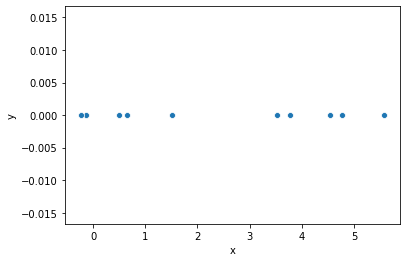

<IPython.core.display.Javascript object>

In [4]:
sns.scatterplot("x", "y", data=df)
plt.show()

* Choose `k` rows from the dataframe at random to be the initial centroids.
    * Note, that [other implementations](https://en.wikipedia.org/wiki/K-means%2B%2B) will do this a little more rigorously than `2` random points.
* Convert the centroids to a numpy array

In [5]:
k = 2

<IPython.core.display.Javascript object>

In [6]:
centroids = df.sample(2).values
centroids

array([[5.57921282, 0.        ],
       [0.64768854, 0.        ]])

<IPython.core.display.Javascript object>

Add the centroids to the plot

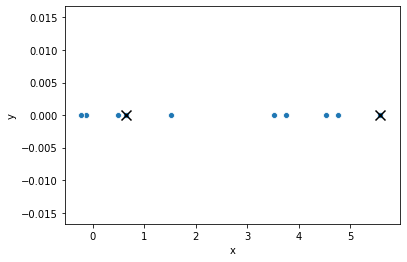

<IPython.core.display.Javascript object>

In [7]:
sns.scatterplot("x", "y", data=df)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=100, c="black")
plt.show()

We want to build towards a for loop to assign each point to a centroid.  For this, we'll use the sum of the squared differences (formula below).

$$\sum_{i=0}^{n}{(x_i - y_i)^2}$$

* $n$ is the total number of features
* $i$ is the current feature index
* $x_i$ is the current feature value for observation $x$
* $y_i$ is the current feature value for observation $y$

The below code chunks have the beginnings of a for loop and blanks to fill in to compute euclidean distance between each row and each centroid

In [8]:
X = np.array(df)

# for x in X:
x = X[0]

<IPython.core.display.Javascript object>

In [9]:
# Take difference between x and centroids
diffs = x - centroids
diffs

array([[-5.08249866,  0.        ],
       [-0.15097439,  0.        ]])

<IPython.core.display.Javascript object>

In [10]:
# Square the differences
sq_diffs = diffs ** 2
sq_diffs

array([[2.58317927e+01, 0.00000000e+00],
       [2.27932650e-02, 0.00000000e+00]])

<IPython.core.display.Javascript object>

In [11]:
# Sum the squared differences by row
dists = np.sum(sq_diffs, axis=1)
dists

array([2.58317927e+01, 2.27932650e-02])

<IPython.core.display.Javascript object>

In [12]:
# Find the index of the centroid closest to x
label = dists.argmin()
label

1

<IPython.core.display.Javascript object>

In [13]:
# Use all of the components you just made to build a for loop
# that assigns a label to each row of X
labels = []
for x in X:
    diffs = x - centroids
    sq_diffs = diffs ** 2
    dists = np.sum(sq_diffs, axis=1)
    label = dists.argmin()
    labels.append(label)

labels

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0]

<IPython.core.display.Javascript object>

Add the assigned labels as a column in the below dataframe named `assigned_df`.

In [14]:
assigned_df = df.copy()
assigned_df["label"] = labels
assigned_df.head()

,x,y,label
0,0.496714,0,1
1,-0.138264,0,1
2,0.647689,0,1
3,1.523030,0,1
4,-0.234153,0,1


<IPython.core.display.Javascript object>

Replot the data with the points colored by cluster assignment

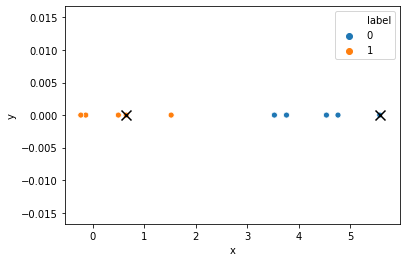

<IPython.core.display.Javascript object>

In [15]:
sns.scatterplot("x", "y", hue="label", data=assigned_df)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
plt.show()

Aggregate `assigned_df` to update the centroids.
* Group by the `'label'` column and take the mean of every other column.
* Convert this output to a numpy array and assign it to `centroids`

In [16]:
agg_df = assigned_df.groupby("label").mean()
centroids = agg_df.values
centroids

array([[4.43711925, 0.        ],
       [0.45900297, 0.        ]])

<IPython.core.display.Javascript object>

Replot the data colored by `'label'` with the new centroids.

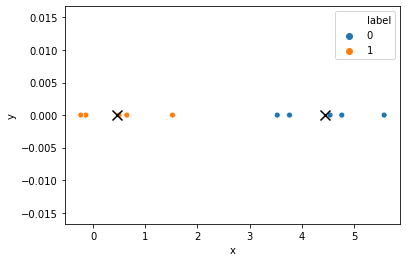

<IPython.core.display.Javascript object>

In [17]:
sns.scatterplot("x", "y", hue="label", data=assigned_df)
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
plt.show()

The process we've been doing is rewritten as functions below.  Take a minute to read over the functions and confirm you understand the logic.

In [18]:
def init_centroids(df, k):
    centroids = df.sample(k).values
    return centroids

<IPython.core.display.Javascript object>

In [19]:
def assign_centroids(X, centroids):
    X = np.array(X)
    centroids = np.array(centroids)

    labels = []
    for x in X:
        diffs = x - centroids
        sq_diffs = diffs ** 2
        dists = np.sum(sq_diffs, axis=1)
        label = dists.argmin()
        labels.append(label)

    return labels

<IPython.core.display.Javascript object>

In [20]:
def update_centroids(assigned_df):
    centroid_agg = assigned_df.groupby("label").mean()
    centroids = centroid_agg.values
    return centroids

<IPython.core.display.Javascript object>

In [21]:
def plot_kmeans(df, centroids):
    sns.scatterplot("x", "y", hue="label", data=df)
    plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker="x", s=100)
    plt.show()

<IPython.core.display.Javascript object>

Use the functions to: 
1. Initialize centroids
* Assign points to centroids
* Plot the current step
* Update centroids

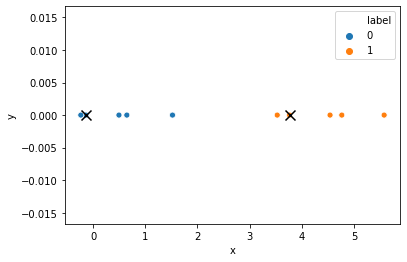

<IPython.core.display.Javascript object>

In [22]:
centroids = init_centroids(df, 2)
labels = assign_centroids(df, centroids)

assigned_df = df.copy()
assigned_df["label"] = labels

plot_kmeans(assigned_df, centroids)
centroids = update_centroids(assigned_df)

Write a for loop to perform the assigning, plotting, and updating `n` times.

In [23]:
n = 4
centroids = init_centroids(df, 2)

<IPython.core.display.Javascript object>

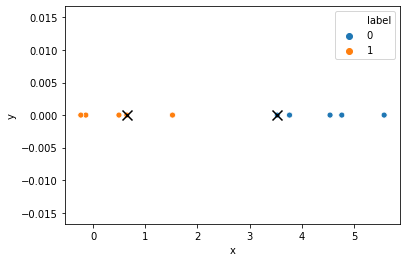

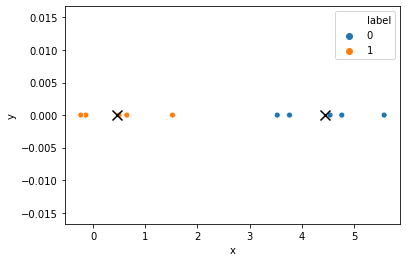

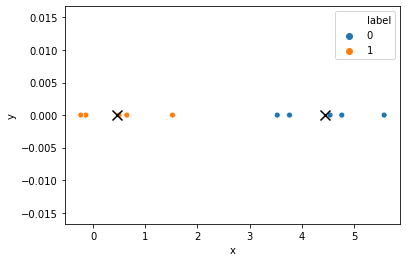

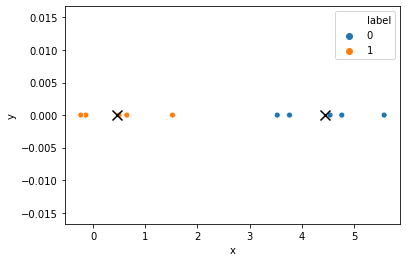

<IPython.core.display.Javascript object>

In [24]:
for _ in range(n):
    labels = assign_centroids(df, centroids)

    assigned_df = df.copy()
    assigned_df["label"] = labels

    plot_kmeans(assigned_df, centroids)
    centroids = update_centroids(assigned_df)

Boom! That's a bonified k-means algorithm.  For extra practice you might:
* Re-do the process with random `y` values instead of all 0s
    * The same code should work
* Re-do the process with a 3rd feature, `z`
    * The same code should work (i think), but the plotting will only show `x` and `y`
* Wrap the whole process up in a single function or class.  Feature requests below:
    * Give the user the option to turn plots on/off
    * Give the user the option to pass in a `random_state` that is used during centroid initialization
    * Give the user the option to specify a maximum number of iterations before the algorithm stops
    * Cause the algorithm to stop early if the centroids didn't change (i.e. it's converged)

Now let's do it the `sklearn` way.

In [25]:
data_url = "https://docs.google.com/spreadsheets/d/1RJrLftlRnj6gmrYewqxykVKSyl7aV-Ktd3sUNQILidM/export?format=csv"
startup = pd.read_csv(data_url)
startup = startup.drop(columns="State")
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


<IPython.core.display.Javascript object>

* Create a scaled version of the data with `StandardScaler()`
* Initialize a `KMeans` instance with `k` clusters.
* `.fit()` it to the `scaled` data

In [26]:
k = 4

<IPython.core.display.Javascript object>

In [27]:
scaler = StandardScaler()
scaled = scaler.fit_transform(startup)

<IPython.core.display.Javascript object>

In [28]:
clst = KMeans(n_clusters=k, random_state=42)
clst.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

* Unscale the `clst.cluster_centers_` using your `StandardScaler` instance.  We need to do this for interpretation.
* Save the unscaled centroids to a dataframe with the same names as the `startup` dataframe

In [29]:
centroids = scaler.inverse_transform(clst.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=startup.columns)
centroids_df

,R&D Spend,Administration,Marketing Spend,Profit
0,47027.395000,142640.157857,85745.092857,90351.204286
1,98022.026111,127743.414444,276077.829444,131841.808333
2,30296.310000,89299.086667,162131.340833,73448.101667
3,149957.510000,116549.878333,405974.428333,180197.555000


<IPython.core.display.Javascript object>

* Interpret the output; try and give names to these clusters that represent their members
* Don't just look at the numbers; visualize the centroids somehow.  
    * A plot?
    * A formatted table?

In [30]:
startup["label"] = clst.labels_

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


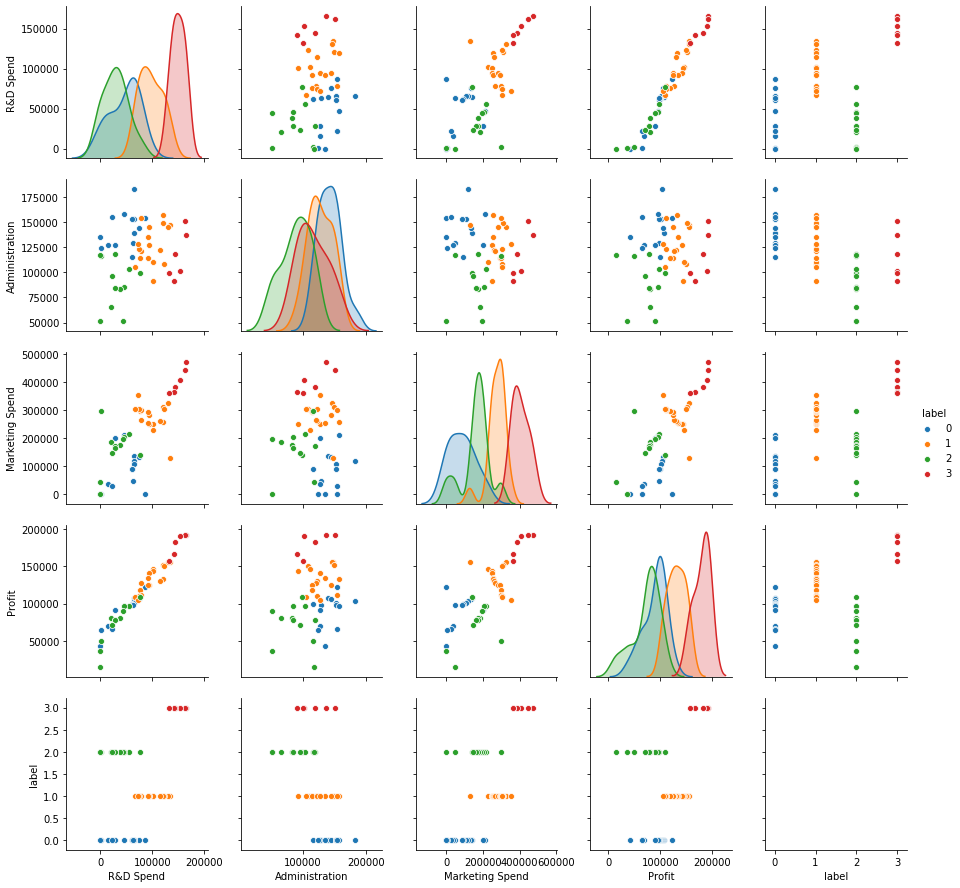

<IPython.core.display.Javascript object>

In [31]:
sns.pairplot(startup, hue="label")
plt.show()

In [34]:
clst_names = [
    "Admins >>>",
    "Marketing is King",
    "What did we do wrong?",
    "Spend money to make money",
]
centroids_df.index = clst_names

<IPython.core.display.Javascript object>

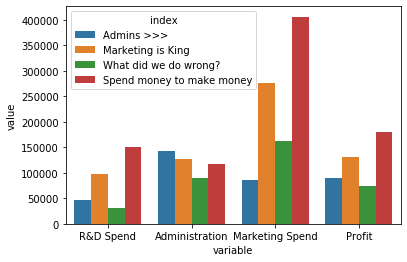

<IPython.core.display.Javascript object>

In [35]:
tall_centroids_df = pd.melt(centroids_df.reset_index(), "index")
sns.barplot("variable", "value", hue="index", data=tall_centroids_df)
plt.show()

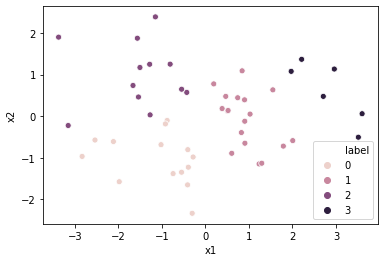

<IPython.core.display.Javascript object>

In [33]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(scaled)
pca_df = pd.DataFrame(pca.transform(scaled), columns=["x1", "x2"])
pca_df["label"] = clst.labels_

sns.scatterplot("x1", "x2", hue="label", data=pca_df)
plt.show()